# Closest Capital - Population Analysis

In [153]:
import pandas as pd
from simpledbf import Dbf5 as db
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

### Reading dbf and excel,converting, adding STATE column and creating DF with state capitals

In [154]:
dbf = db("distances_brasil.dbf")
distance_cities = dbf.to_dataframe()
population = pd.read_excel("output_distance.xlsx")
distance_cities = distance_cities.drop(["codmun1"],axis=1)
population = population.drop(["Unnamed: 0"],axis=1)
distance_cities.at[distance_cities[distance_cities["NAME"]=="São Francisco de Assis do Piauí/P"].index[0],
          "NAME"] = "São Francisco de Assis do Piauí/PI"
distance_cities.at[distance_cities[distance_cities["NAME"]=="Vila Bela da Santíssima Trindade/M"].index[0],
          "NAME"] = "Vila Bela da Santíssima Trindade/MT"
distance_cities.at[distance_cities[distance_cities["NAME"]=="São Sebastião de Lagoa de Roça/P"].index[0],
          "NAME"] = "São Sebastião de Lagoa de Roça/PB"
distance_cities["STATE"] = [i.split("/")[-1] for i in distance_cities["NAME"]]
distance_cities

,NAME,NEAR_FID,NEAR_DIST,STATE
0,Aracaju/SE,1,1.279808e-10,SE
1,Belém/PA,2,1.580439e-10,PA
2,Belo Horizonte/MG,3,5.696375e-10,MG
3,Boa Vista/RR,4,3.281908e-10,RR
4,Brasília/DF,5,4.157356e-10,DF
...,...,...,...,...
5555,Xique-Xique/BA,23,4.735711e+00,BA
5556,Zabelê/PB,14,2.094263e+00,PB
5557,Zacarias/SP,25,4.229949e+00,SP
5558,Zé Doca/MA,24,1.679836e+00,MA


In [155]:
capitals = distance_cities[distance_cities.index < 27]

### Merging population and distance_cities DFs

In [156]:
pop_cities = pd.merge(population, distance_cities)
pop_cities

,NAME,POPULAÇÃO ESTIMADA,STATE,NEAR_FID,NEAR_DIST
0,Aracaju/SE,632744,SE,1,1.279808e-10
1,Belém/PA,1439561,PA,2,1.580439e-10
2,Belo Horizonte/MG,2502557,MG,3,5.696375e-10
3,Boa Vista/RR,320714,RR,4,3.281908e-10
4,Brasília/DF,2914830,DF,5,4.157356e-10
...,...,...,...,...,...
5555,Xique-Xique/BA,48316,BA,23,4.735711e+00
5556,Zabelê/PB,2208,PB,14,2.094263e+00
5557,Zacarias/SP,2574,SP,25,4.229949e+00
5558,Zé Doca/MA,50507,MA,24,1.679836e+00


In [157]:
#pop_cities_capital = pd.merge(population, capitals, left_index=True, right_index=True)

### Adding the column Closest Capital, with the closest capital to each brazilian city

In [158]:
pop_cities["Closest Capital"] = [capitals[capitals["NEAR_FID"] == i]["NAME"].to_numpy()[0]
                              for i in pop_cities["NEAR_FID"]]
pop_cities

,NAME,POPULAÇÃO ESTIMADA,STATE,NEAR_FID,NEAR_DIST,Closest Capital
0,Aracaju/SE,632744,SE,1,1.279808e-10,Aracaju/SE
1,Belém/PA,1439561,PA,2,1.580439e-10,Belém/PA
2,Belo Horizonte/MG,2502557,MG,3,5.696375e-10,Belo Horizonte/MG
3,Boa Vista/RR,320714,RR,4,3.281908e-10,Boa Vista/RR
4,Brasília/DF,2914830,DF,5,4.157356e-10,Brasília/DF
...,...,...,...,...,...,...
5555,Xique-Xique/BA,48316,BA,23,4.735711e+00,Salvador/BA
5556,Zabelê/PB,2208,PB,14,2.094263e+00,Maceió/AL
5557,Zacarias/SP,2574,SP,25,4.229949e+00,São Paulo/SP
5558,Zé Doca/MA,50507,MA,24,1.679836e+00,São Luís/MA


### Correcting cell and converting population to int

In [159]:
pop_cities.at[pop_cities[pop_cities["POPULAÇÃO ESTIMADA"] == "41.487(*)"].index[0],
          "POPULAÇÃO ESTIMADA"] = "41487"
pop_cities["POPULAÇÃO ESTIMADA"] = pop_cities["POPULAÇÃO ESTIMADA"].astype(int)

### Grouping DF by state and Closest Capital summing population

In [160]:
grouped_states = pop_cities.groupby(["STATE","Closest Capital"])["POPULAÇÃO ESTIMADA"].sum().to_frame()
grouped_states = grouped_states.sort_values('POPULAÇÃO ESTIMADA', ascending=False).sort_index(level='STATE', sort_remaining=False)
grouped_states

POPULAÇÃO ESTIMADA
STATE Closest Capital                      
AC    Rio Branco/AC                  803513
AL    Maceió/AL                     2782411
      Aracaju/SE                     558521
AM    Manaus/AM                     3322582
      Rio Branco/AC                  346268
...                                     ...
SP    Rio de Janeiro/RJ              160529
      Belo Horizonte/MG                3597
TO    Palmas/TO                     1363128
      Belém/PA                       131224
      Brasília/DF                     20774

[83 rows x 1 columns]

### Getting the population closer to each capital - nationwide level

In [161]:
close_sum = pd.Series({i:grouped_states.xs(i,level=1).sum().to_numpy()[0] for i in capitals["NAME"]})
close_sum_sorted = close_sum.sort_values(ascending=False)
close_sum_sorted.head(10)

São Paulo/SP         42127566
Rio de Janeiro/RJ    17393326
Curitiba/PR          13425941
Belo Horizonte/MG    13324194
Salvador/BA          12629410
Porto Alegre/RS      12196077
Fortaleza/CE          9117623
Goiânia/GO            7405562
Vitória/ES            6725499
Recife/PE             6437819
dtype: int64

### Getting the population closer to each capital - state level

In [162]:
state_cities = pd.Series({j:grouped_states.loc[i,j].to_numpy()[0] for i,j in zip(capitals["STATE"],capitals["NAME"])})
state_cities_sorted = state_cities.sort_values(ascending=False)
state_cities_sorted.head(10)

São Paulo/SP         40394666
Rio de Janeiro/RJ    15770090
Belo Horizonte/MG    13320597
Salvador/BA          12383385
Porto Alegre/RS      11247972
Curitiba/PR           9708300
Fortaleza/CE          8154460
Recife/PE             6310945
Belém/PA              5783048
Goiânia/GO            4915758
dtype: int64

### Getting the population by state

In [163]:
state_pop = pd.Series({i:grouped_states.xs(i).sum().to_numpy()[0] for i in capitals["STATE"]})
state_pop_sorted = state_pop.sort_values(ascending=False)
state_pop_sorted.head(10)

SP    44396484
MG    20869101
RJ    16550024
BA    15203934
RS    11247972
PR    11163018
PE     9342243
CE     8904459
PA     8191477
MA     6904241
dtype: int64

### Ploting the percent of population within the capital's influence zone - statet level

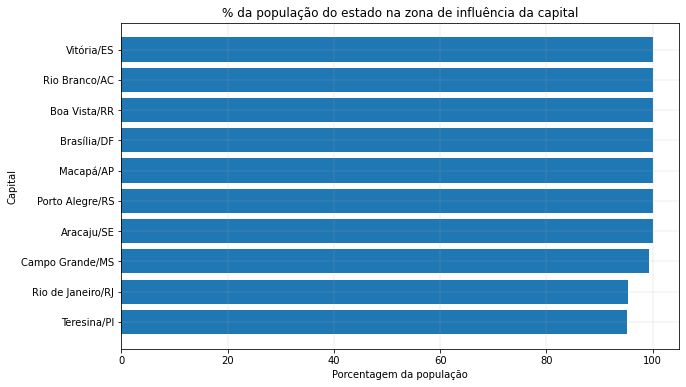

In [164]:
state_capitals = capitals["NAME"].unique()
percent_of_cities = pd.Series({state_capitals[i]:(state_cities[i]/state_pop[i])*100 for i in range(27)})
percent_of_cities = percent_of_cities.sort_values(ascending=True).tail(10)
plt.barh(percent_of_cities.index,percent_of_cities.values)
plt.title("% da população do estado na zona de influência da capital")
plt.xlabel('Porcentagem da população')
plt.ylabel('Capital')
plt.grid(lw="0.2")
plt.show()

### Ploting the percent of population within the capital's influence zone - nationwide level

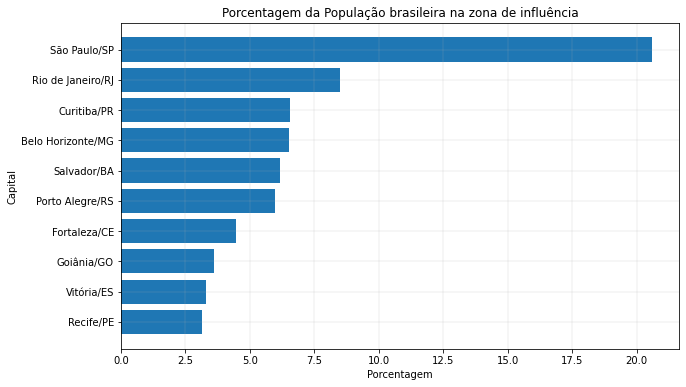

In [165]:
percent_of_cities_national = pd.Series({state_capitals[i]:(close_sum[i]/state_pop.sum())*100 for i in range(27)})
percent_of_cities_national = percent_of_cities_national.sort_values(ascending=True).tail(10)
plt.barh(percent_of_cities_national.index,percent_of_cities_national.values)
plt.title("Porcentagem da População brasileira na zona de influência")
plt.xlabel("Porcentagem")
plt.ylabel('Capital')
plt.grid(lw="0.2")
plt.show()

### Ploting the percent of population per capital of influence - São Paulo State

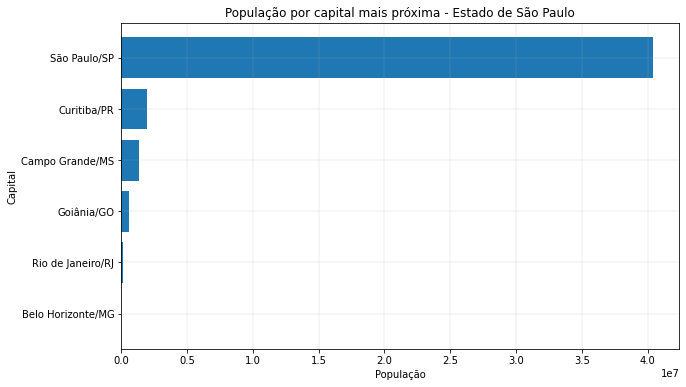

In [166]:
grouped_series = pd.Series(grouped_states['POPULAÇÃO ESTIMADA'], index=grouped_states.index).sort_values(ascending=True)
plt.barh(grouped_series["SP"].index,grouped_series["SP"].values)
plt.title("População por capital mais próxima - Estado de São Paulo")
plt.xlabel('População')
plt.ylabel('Capital')
plt.grid(lw=0.2)
plt.show()

### Ploting the percent of population per capital of influence - Minas Gerais

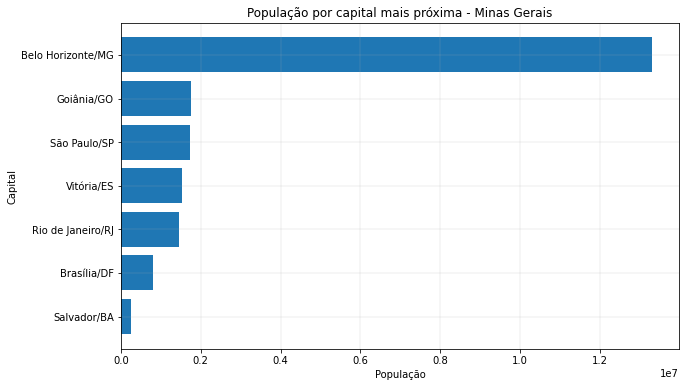

In [167]:
plt.barh(grouped_series["MG"].index,grouped_series["MG"].values)
plt.title("População por capital mais próxima - Minas Gerais")
plt.xlabel('População')
plt.ylabel('Capital')
plt.grid(lw=0.2)
plt.show()